In [1]:
import os
import netCDF4
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
%matplotlib inline

In [3]:
path_accmip = '/local/mwe14avu/UEA/PhD/models/external_data/ACCMIP_emissions'

In [4]:
_emis_nox = Dataset(os.path.join(path_accmip,'ACCMIP_anthro_NOx_1850-2000_24811.nc'))
_emis_eth = Dataset(os.path.join(path_accmip,'ACCMIP_anthro_ethane_1850-2000_24811.nc'))
_emis_pro = Dataset(os.path.join(path_accmip,'ACCMIP_anthro_propane_1850-2000_24811.nc'))
_emis_but = Dataset(os.path.join(path_accmip,'ACCMIP_anthro_butanes_1850-2000_24811.nc'))
_emis_pen = Dataset(os.path.join(path_accmip,'ACCMIP_anthro_pentanes_1850-2000_24811.nc'))

In [5]:
lons = _emis_but.variables['lon'][:]
lats = _emis_but.variables['lat'][:]
year = _emis_but.variables['date'][:] # 16 decades, 1850-2000
emis_nox = _emis_nox.variables['ACCMIP'][:]
emis_eth = _emis_eth.variables['ACCMIP'][:]
emis_pro = _emis_pro.variables['ACCMIP'][:]
emis_but = _emis_but.variables['ACCMIP'][:]
emis_pen = _emis_pen.variables['ACCMIP'][:]
_emis_nox.close()
_emis_eth.close()
_emis_pro.close()
_emis_but.close()
_emis_pen.close()

In [6]:
# # Year 1990 means
# print('ACCMIP global mean anthropogenic emission fluxes [kg m-2 s-1] for year 1990',
#       'NOx: {_a:.2e}'.format(_a=emis_nox[-2, ...].mean()),
#       'ethane: {_b:.2e}'.format(_b=emis_eth[-2, ...].mean()),
#       'propane: {_c:.2e}'.format(_c=emis_pro[-2, ...].mean()),
#       'butane: {_d:.2e}'.format(_d=emis_but[-2, ...].mean()), 
#       'pentane: {_e:.2e}'.format(_e=emis_pen[-2, ...].mean()), sep='\n')

In [7]:
# Year 2000 means
print('ACCMIP global mean anthropogenic emission fluxes [kg m-2 s-1] for year 2000',
      'NOx: {_a:.2e}'.format(_a=emis_nox[-1,...].mean()),
      'ethane: {_b:.2e}'.format(_b=emis_eth[-1,...].mean()),
      'propane: {_c:.2e}'.format(_c=emis_pro[-1,...].mean()),
      'butane: {_d:.2e}'.format(_d=emis_but[-1,...].mean()), 
      'pentane: {_e:.2e}'.format(_e=emis_pen[-1,...].mean()), sep='\n')

ACCMIP global mean anthropogenic emission fluxes [kg m-2 s-1] for year 2000
NOx: 3.48e-12
ethane: 1.55e-13
propane: 1.81e-13
butane: 4.99e-13
pentane: 6.96e-13


In [8]:
# Calculate mass flow rates in Tg year-1
earth_surf_area = 510072000*1e6 # [m2]
sec_in_year = 365*24*60*60
emis_nox_in_Tg_per_year2000 = emis_nox[-1,...].mean()*earth_surf_area*sec_in_year*1e-9
emis_eth_in_Tg_per_year2000 = emis_eth[-1,...].mean()*earth_surf_area*sec_in_year*1e-9
emis_pro_in_Tg_per_year2000 = emis_pro[-1,...].mean()*earth_surf_area*sec_in_year*1e-9
emis_but_in_Tg_per_year2000 = emis_but[-1,...].mean()*earth_surf_area*sec_in_year*1e-9
emis_pen_in_Tg_per_year2000 = emis_pen[-1,...].mean()*earth_surf_area*sec_in_year*1e-9
print('ACCMIP global mean tendency of anthropogenic emissions [Tg year-1] for year 2000',
      'NOx: {_a:1.2f}'.format(_a=emis_nox_in_Tg_per_year2000),
      'ethane: {_b:1.2f}'.format(_b=emis_eth_in_Tg_per_year2000),
      'propane: {_c:1.2f}'.format(_c=emis_pro_in_Tg_per_year2000),
      'butane: {_d:1.2f}'.format(_d=emis_but_in_Tg_per_year2000), 
      'pentane: {_e:1.2f}'.format(_e=emis_pen_in_Tg_per_year2000), sep='\n')

ACCMIP global mean tendency of anthropogenic emissions [Tg year-1] for year 2000
NOx: 55.97
ethane: 2.49
propane: 2.91
butane: 8.03
pentane: 11.20


In [9]:
# molar_mass = [30.0, 44.0, 57.8, 72.0, 68.12] # [g mol-1]
emis_VOC_in_TgC_per_year2000 = 1e3*(emis_eth[-1,...].mean()*2*12.011/30.0 + 
                                    emis_pro[-1,...].mean()*3*12.011/44.0 + 
                                    emis_but[-1,...].mean()*4*12.011/57.8 + 
                                    emis_pen[-1,...].mean()*5*12.011/72.0)*earth_surf_area*sec_in_year*1e-12
emis_NOx_in_TgNOx_per_year2000 = 1e3*emis_nox[-1,...].mean()*earth_surf_area*sec_in_year*1e-12
emis_NOx_in_TgN_per_year2000 = 1e3*emis_nox[-1,...].mean()*14.007/30.0*earth_surf_area*sec_in_year*1e-12
print('ACCMIP anthropogenic NOx in TgN year-1, VOC in TgC year-1 for year 2000',
      'NOx: {_f:1.2f}'.format(_f=emis_NOx_in_TgN_per_year2000),
      'VOC: {_g:1.2f}'.format(_g=emis_VOC_in_TgC_per_year2000), sep='\n')

ACCMIP anthropogenic NOx in TgN year-1, VOC in TgC year-1 for year 2000
NOx: 26.13
VOC: 20.39


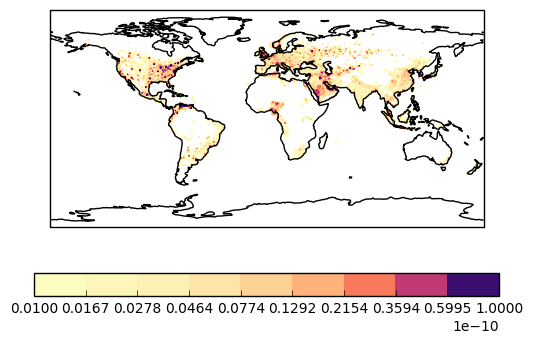

In [10]:
# Plot
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
p = ax.contourf(lons, lats, emis_but[-1,...], levels=np.logspace(-12, -10, 10), cmap='magma_r', transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
fig.colorbar(p, orientation='horizontal')

In [11]:
glob_ave_emis_eth = []
glob_ave_emis_pro = []
for yr in range(0, 15):
    glob_ave_emis_eth.append(emis_eth[yr,...].mean())
    glob_ave_emis_pro.append(emis_pro[yr,...].mean())

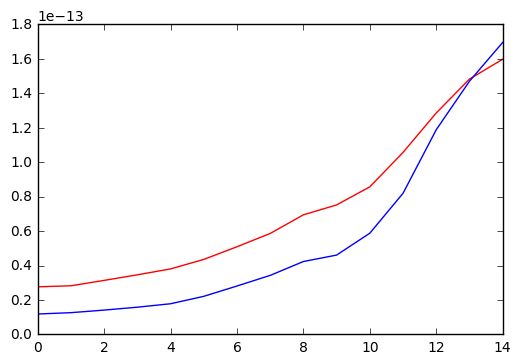

In [12]:
plt.plot(glob_ave_emis_eth, 'r')
plt.plot(glob_ave_emis_pro, 'b')